In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import os
import numpy as np
from paths import path
from lib import read_vplanet
from lib import sigfigs

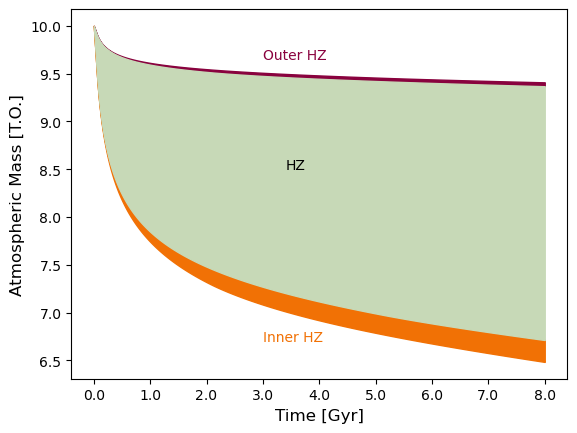

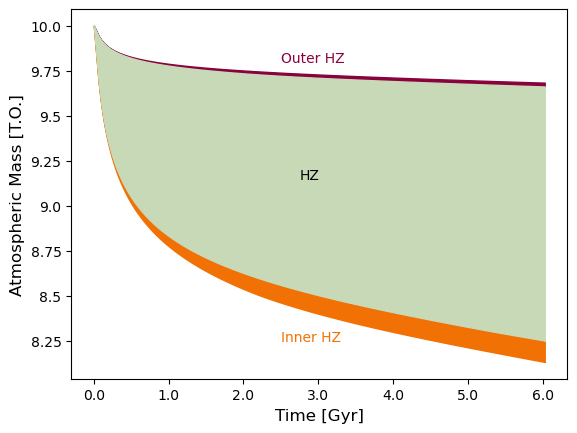

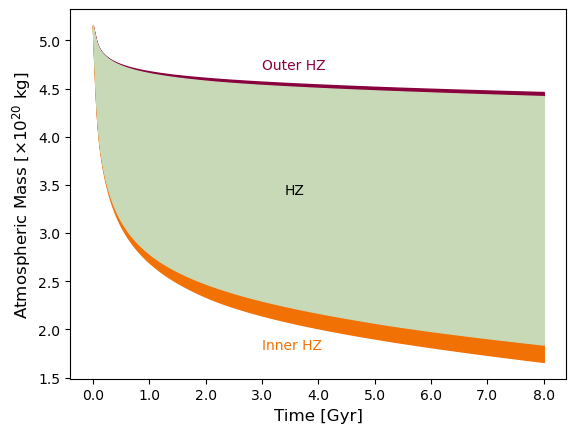

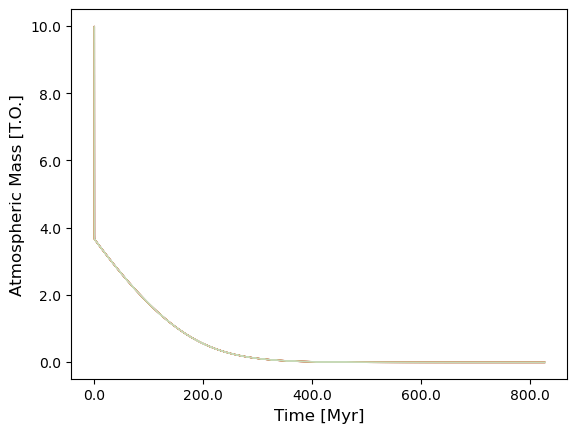

In [116]:
synthesis_dir = path('data', 'parameter_sweeps', 'synthesis')

# Plot atmospheric evolution ranges.
def plot_evolution(d):
    key = 'SurfWaterMass' if '_water' in d else 'EnvelopeMass'

    min_inner_HZ = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a0', 'star.earth.forward'))
    min_outer_HZ = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a1', 'star.earth.forward'))
    max_inner_HZ = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a0', 'star.earth.forward'))
    max_outer_HZ = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a1', 'star.earth.forward'))

    fig, ax = plt.subplots()

    mask = (min_inner_HZ[key] > 0.0) | (max_inner_HZ[key] > 0.0) | (min_outer_HZ[key] > 0.0) | (max_outer_HZ[key] > 0.0)
    
    final_index = np.argmin(mask)    
    mask[final_index] = True # Include the final zero point.
    
    time = min_outer_HZ['Time'][mask] # The time sequence. Could have been from any of the outputs since they're the same.

    timescale = 'Gyr' if (time.iloc[-1]/1e9) > 1 else 'Myr'
    massscale = 'T.O.' if key == 'SurfWaterMass' else r'$\times 10^{20}$ kg'

    timescale_mult = {
        'Myr': 1e6,
        'Gyr': 1e9
    }


    massscale_mult = {
        'T.O.': 1,
        r'$\times 10^{20}$ kg': 1e20,
    }


    ax.fill_between(time, min_outer_HZ[key][mask], max_outer_HZ[key][mask], label = 'Outer HZ', color = '#89023E')
    ax.fill_between(time, min_inner_HZ[key][mask], max_inner_HZ[key][mask], label = 'Inner HZ', color = "#F17105")
    ax.fill_between(time, max_inner_HZ[key][mask], min_outer_HZ[key][mask], label = 'Inner HZ', color = '#C7D9B7')

    ax.xaxis.set_major_formatter(tck.FuncFormatter(lambda x,pos: x/timescale_mult[timescale]))
    ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x,pos: x/massscale_mult[massscale])) 

    ax.set_xlabel("Time [{units}]".format(units = timescale), fontsize = 12)
    ax.set_ylabel(r"Atmospheric Mass [{units}]".format(units = massscale), fontsize = 12)
    
    return fig, ax

(fig, ax) = plot_evolution('kv_water')
ax.text(3e9, 6.7, 'Inner HZ', color = '#F17105')
ax.text(3e9, 9.65, 'Outer HZ', color = '#89023E')
ax.text(3.4e9, 8.5, 'HZ', color = 'black')

(fig, ax) = plot_evolution('sun_water')
ax.text(2.5e9, 8.25, 'Inner HZ', color = '#F17105')
ax.text(2.5e9, 9.8, 'Outer HZ', color = '#89023E')
ax.text(2.75e9, 9.15, 'HZ', color = 'black')

(fig, ax) = plot_evolution('kv')
ax.text(3e9, 1.8e20, 'Inner HZ', color = '#F17105')
ax.text(3e9, 4.7e20, 'Outer HZ', color = '#89023E')
ax.text(3.4e9, 3.4e20, 'HZ', color = 'black')

(fig, ax) = plot_evolution('trappist_water')
#ax.text(2.5e9, 3.25e20, 'Inner HZ', color = '#F17105')
#ax.text(2.5e9, 4.9e20, 'Outer HZ', color = '#89023E')
#ax.text(2.75e9, 4.2e20, 'HZ', color = 'black')

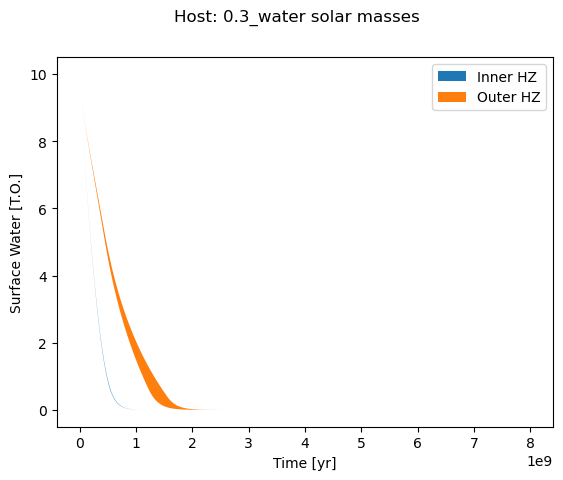

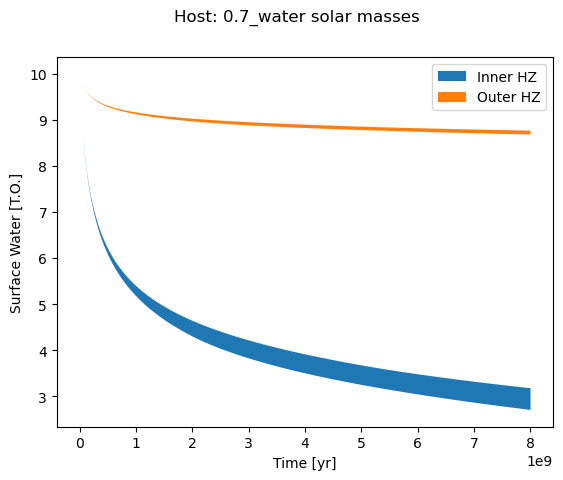

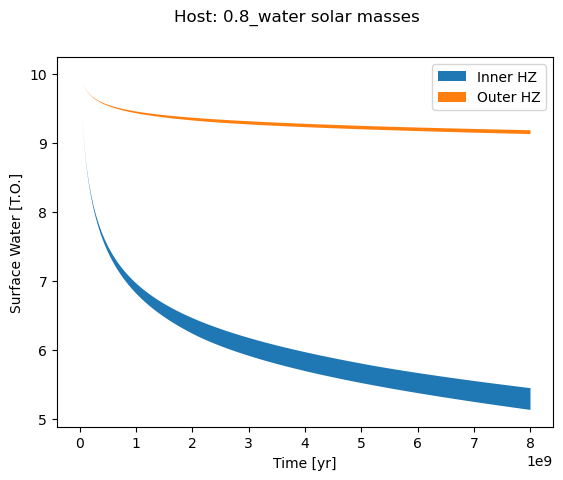

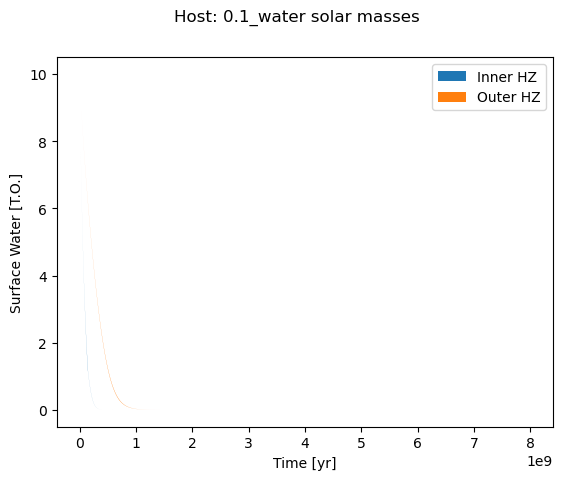

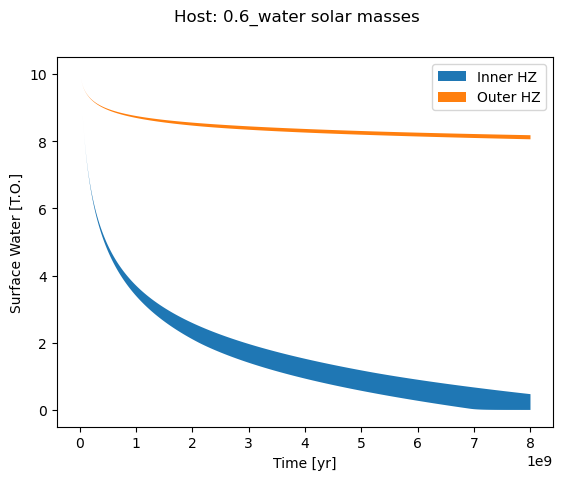

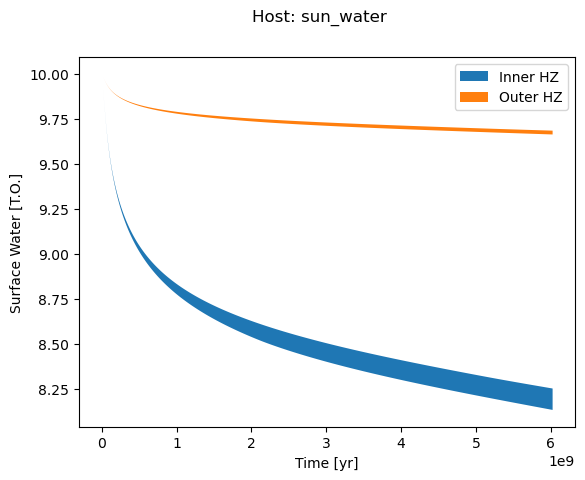

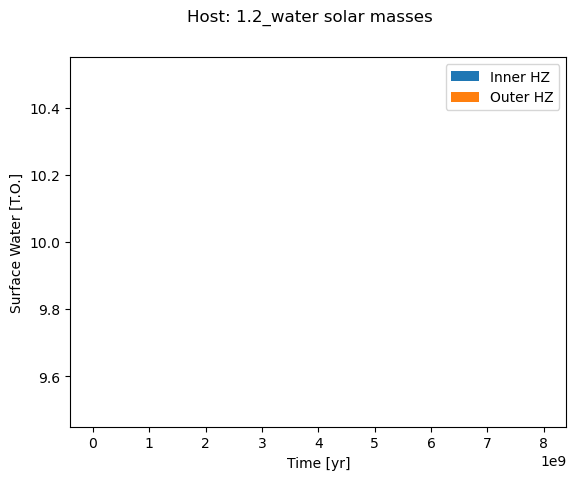

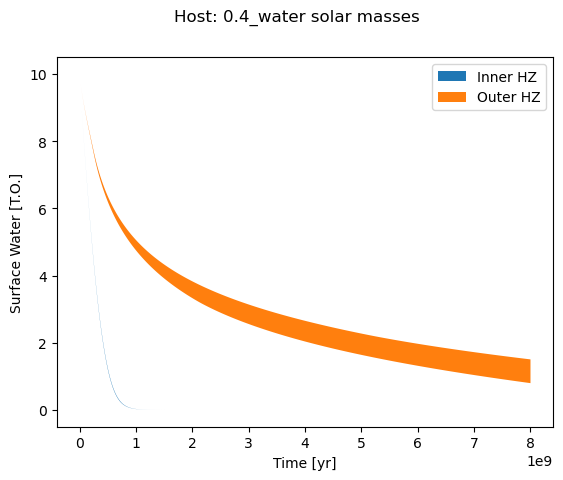

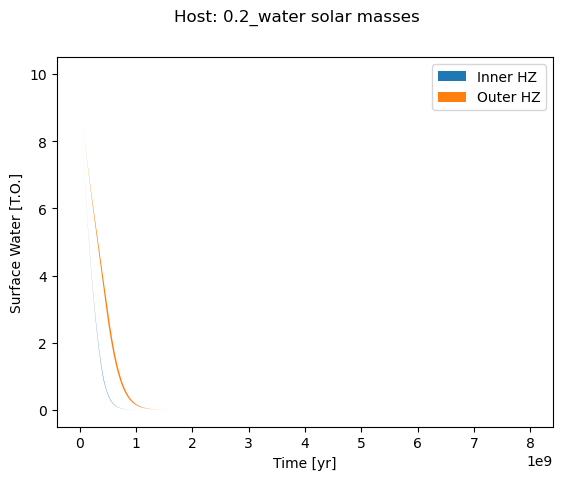

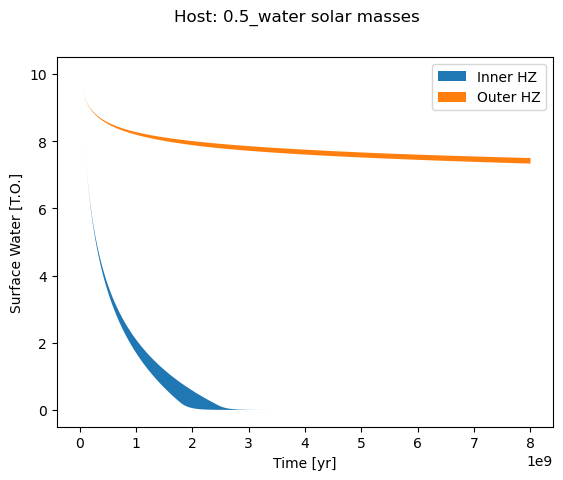

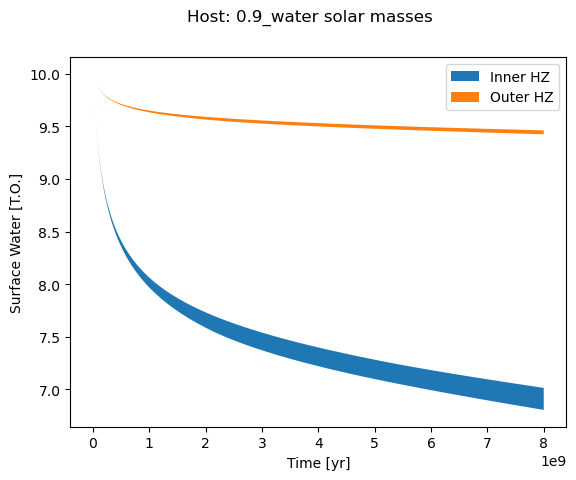

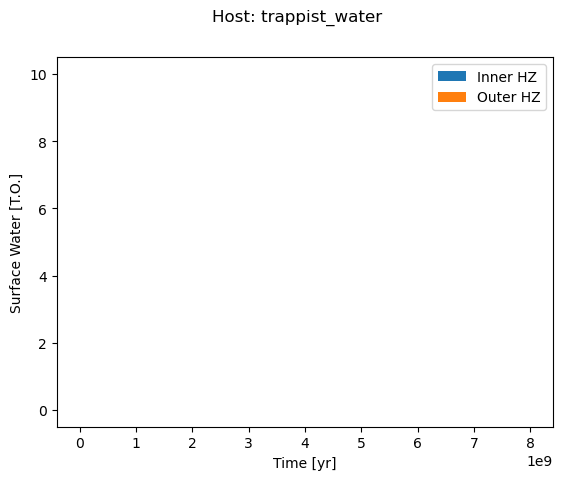

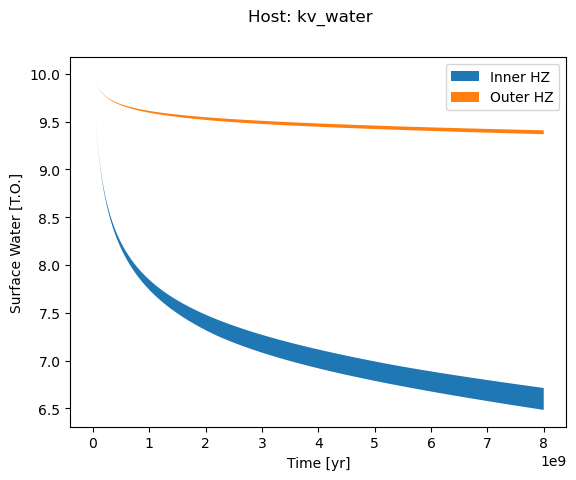

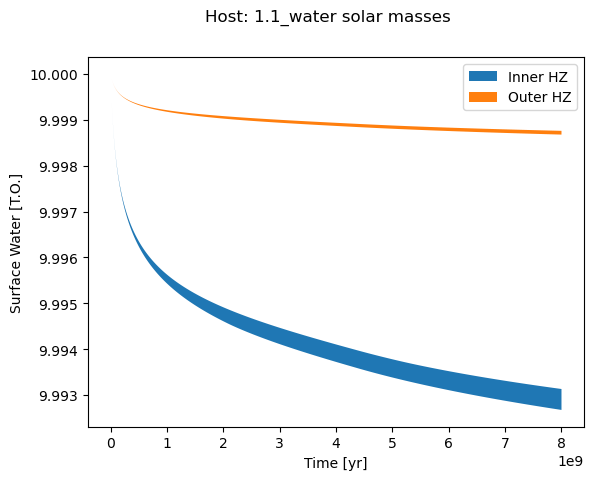

In [9]:
synthesis_dir = path('data', 'parameter_sweeps', 'synthesis')

for d in os.listdir(synthesis_dir):
    if '.' in d or not '_water' in d:
        continue

    min_inner_HZ = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a0', 'star.earth.forward'))
    min_outer_HZ = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a1', 'star.earth.forward'))
    max_inner_HZ = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a0', 'star.earth.forward'))
    max_outer_HZ = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a1', 'star.earth.forward'))

    fig, ax = plt.subplots()
    ax.fill_between(min_inner_HZ['Time'], min_inner_HZ['SurfWaterMass'], max_inner_HZ['SurfWaterMass'], label = 'Inner HZ')
    ax.fill_between(min_outer_HZ['Time'], min_outer_HZ['SurfWaterMass'], max_outer_HZ['SurfWaterMass'], label = 'Outer HZ')
    ax.legend()
    ax.set_xlabel("Time [yr]")
    ax.set_ylabel("Surface Water [T.O.]")
    
    l = 'Host: ' + (d if 'm' not in d else (d.split('p')[0] + '.' + d.split('p')[1]).strip('m') + ' solar masses')
    
    fig.suptitle(l)

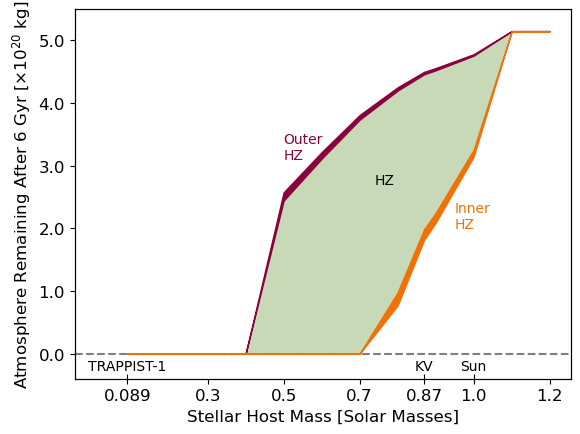

In [ ]:
synthesis_dir = path('data', 'parameter_sweeps', 'synthesis')

mass_map = {
    'trappist': 0.089,
    'm0p1': 0.1,
    'm0p2': 0.2,
    'm0p3': 0.3,
    'm0p4': 0.4,
    'm0p5': 0.5,
    'm0p6': 0.6,
    'm0p7': 0.7,
    'm0p8': 0.8,
    'kv': 0.869598,
    'm0p9': 0.9,
    'sun': 1,
    'm1p1': 1.1,
    'm1p2': 1.2,
}

fig, ax = plt.subplots()

min_inner_hz = []
min_outer_hz = []
max_inner_hz = []
max_outer_hz = []
masses = []

#sorted(key = lambda a, b: mass_map[a] > mass_map[b])

dirs = []

for d in os.listdir(synthesis_dir):
    if '.' in d or '_water' in d:
        continue

    dirs.append(d)

list.sort(dirs, key = lambda a: mass_map[a])

for d in dirs:
    out_min_inner_hz = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a0', 'star.earth.forward'))
    out_min_outer_hz = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a1', 'star.earth.forward'))
    out_max_inner_hz = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a0', 'star.earth.forward'))
    out_max_outer_hz = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a1', 'star.earth.forward'))

    time = 6e9
    mask = out_min_inner_hz['Time'] == time

    masses.append(mass_map[d])
    min_inner_hz.append(out_min_inner_hz['EnvelopeMass'][mask].iloc[0])
    max_inner_hz.append(out_max_inner_hz['EnvelopeMass'][mask].iloc[0])
    min_outer_hz.append(out_min_outer_hz['EnvelopeMass'][mask].iloc[0])
    max_outer_hz.append(out_max_outer_hz['EnvelopeMass'][mask].iloc[0])

ax.fill_between(masses, min_outer_hz, max_inner_hz, color = '#C7D9B7')
ax.fill_between(masses, min_outer_hz, max_outer_hz, color = '#89023E', label = 'Outer HZ')
ax.fill_between(masses, min_inner_hz, max_inner_hz, color = '#F17105', label = 'Inner HZ')
ax.set_xlabel("Stellar Host Mass [Solar Masses]", fontsize = 12)
ax.set_ylabel(r"Atmosphere Remaining After 6 Gyr [$\times 10^{20}$ kg]", fontsize = 12)
ax.yaxis.set_major_locator(tck.FixedLocator([0e20, 1e20, 2e20, 3e20, 4e20, 5e20]))
ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: x/1e20))
ax.xaxis.set_major_locator(tck.FixedLocator([mass_map['trappist'], mass_map['sun'], mass_map['kv'], 0.3, 0.5, 0.7, 1.2]))
ax.xaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: sigfigs(x, 2)))
ax.set_xlim(-0.05)
ax.set_ylim(-0.4e20, 5.5e20)
ax.tick_params(axis = 'both', labelsize = 12)

ax.text(0.5, 3.1e20, 'Outer\nHZ', color = '#89023E')
ax.text(0.95, 2e20, 'Inner\nHZ', color = '#F17105')
#ax.text(0.0, 4.8e20, 'OUTSIDE HZ')
#ax.text(0.95, 0.5e20, 'OUTSIDE HZ')
ax.text(0.74, 2.7e20, 'HZ')

inset_ax = ax.inset_axes([0, 0, 1, 1], xlim = ax.get_xlim(), ylim = ax.get_ylim(), xticks = [
    mass_map['trappist'],
    mass_map['kv'],
    mass_map['sun'],
], zorder = -1)

inset_ax.xaxis.set_major_formatter(lambda x, pos: ['TRAPPIST-1', 'KV', 'Sun'][pos])
inset_ax.yaxis.set_visible(False)
inset_ax.tick_params(axis = 'x', direction = 'in', pad = -14)

xmin, xmax = ax.get_xlim()

ax.hlines(0.0e20, xmin, xmax, color = 'black', zorder = 0, linestyles='dashed', alpha = 0.5)

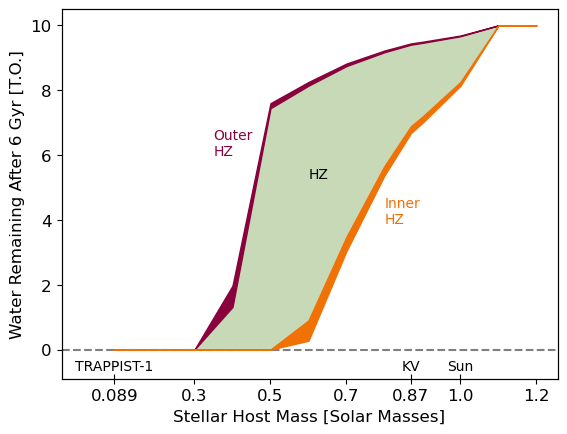

In [24]:
synthesis_dir = path('data', 'parameter_sweeps', 'synthesis')

mass_map = {
    'trappist_water': 0.089,
    'm0p1_water': 0.1,
    'm0p2_water': 0.2,
    'm0p3_water': 0.3,
    'm0p4_water': 0.4,
    'm0p5_water': 0.5,
    'm0p6_water': 0.6,
    'm0p7_water': 0.7,
    'm0p8_water': 0.8,
    'kv_water': 0.869598,
    'm0p9_water': 0.9,
    'sun_water': 1,
    'm1p1_water': 1.1,
    'm1p2_water': 1.2,
}

fig, ax = plt.subplots()

min_inner_hz = []
min_outer_hz = []
max_inner_hz = []
max_outer_hz = []
masses = []

#sorted(key = lambda a, b: mass_map[a] > mass_map[b])

dirs = []

for d in os.listdir(synthesis_dir):
    if '.' in d or not '_water' in d:
        continue

    dirs.append(d)

list.sort(dirs, key = lambda a: mass_map[a])

for d in dirs:
    out_min_inner_hz = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a0', 'star.earth.forward'))
    out_min_outer_hz = read_vplanet(path(synthesis_dir, d, 'run_K0_ThU0_a1', 'star.earth.forward'))
    out_max_inner_hz = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a0', 'star.earth.forward'))
    out_max_outer_hz = read_vplanet(path(synthesis_dir, d, 'run_K1_ThU1_a1', 'star.earth.forward'))

    time = 6e9
    mask = out_min_inner_hz['Time'] == time

    masses.append(mass_map[d])
    min_inner_hz.append(out_min_inner_hz['SurfWaterMass'][mask].iloc[0])
    max_inner_hz.append(out_max_inner_hz['SurfWaterMass'][mask].iloc[0])
    min_outer_hz.append(out_min_outer_hz['SurfWaterMass'][mask].iloc[0])
    max_outer_hz.append(out_max_outer_hz['SurfWaterMass'][mask].iloc[0])

ax.fill_between(masses, min_outer_hz, max_inner_hz, color = '#C7D9B7')
ax.fill_between(masses, min_outer_hz, max_outer_hz, color = '#89023E', label = 'Outer HZ')
ax.fill_between(masses, min_inner_hz, max_inner_hz, color = '#F17105', label = 'Inner HZ')
ax.set_xlabel("Stellar Host Mass [Solar Masses]", fontsize = 12)
ax.set_ylabel(r"Water Remaining After 6 Gyr [T.O.]", fontsize = 12)
#ax.yaxis.set_major_locator(tck.FixedLocator([0e20, 1e20, 2e20, 3e20, 4e20, 5e20]))
#ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: x/1e20))
ax.xaxis.set_major_locator(tck.FixedLocator([mass_map['trappist_water'], mass_map['sun_water'], mass_map['kv_water'], 0.3, 0.5, 0.7, 1.2]))
ax.xaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: sigfigs(x, 2)))
ax.set_xlim(-0.05)
ax.set_ylim(-0.9)
ax.tick_params(axis = 'both', labelsize = 12)

ax.text(0.35, 6, 'Outer\nHZ', color = '#89023E')
ax.text(0.8, 3.9, 'Inner\nHZ', color = '#F17105',)
ax.text(0.6, 5.3, 'HZ')

inset_ax = ax.inset_axes([0, 0, 1, 1], xlim = ax.get_xlim(), ylim = ax.get_ylim(), xticks = [
    mass_map['trappist_water'],
    mass_map['kv_water'],
    mass_map['sun_water'],
], zorder = -1)

inset_ax.xaxis.set_major_formatter(lambda x, pos: ['TRAPPIST-1', 'KV', 'Sun'][pos])
inset_ax.yaxis.set_visible(False)
inset_ax.tick_params(axis = 'x', direction = 'in', pad = -14)

xmin, xmax = ax.get_xlim()

ax.hlines(0.0, xmin, xmax, color = 'black', zorder = 0, linestyles='dashed', alpha = 0.5)